In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
#----------Importing the Dataset-----------#

dataset = pd.read_csv('K:/Datasets/Multivariant_Linear_Regression/archive/50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [59]:
#----------Finding length(no. of rows) of dataset-----------#

len(dataset)

50

In [60]:
#----------Finding shape(no. of rows and columns) of dataset-----------#

dataset.shape

(50, 5)

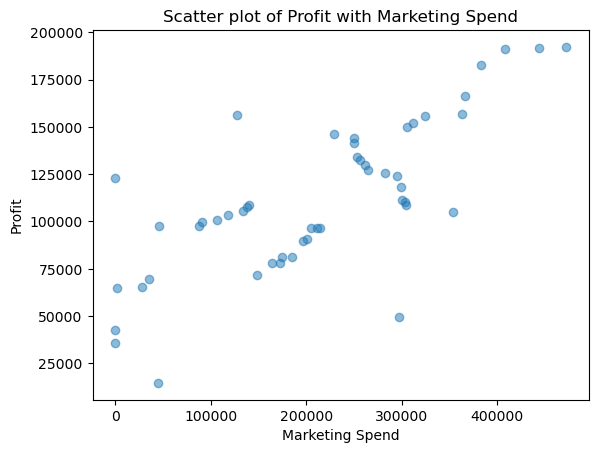

In [61]:
#----------Plotting----------#

plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

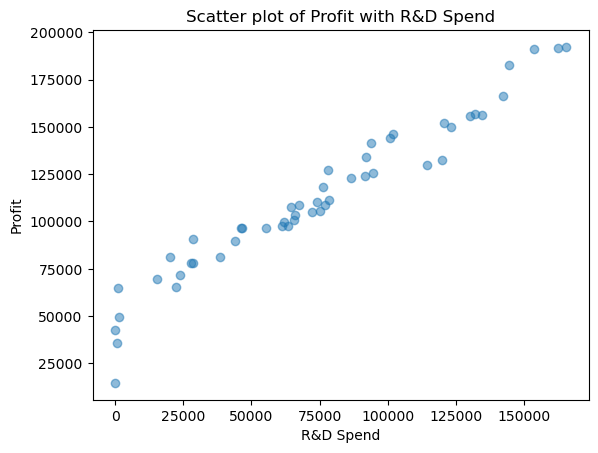

In [84]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

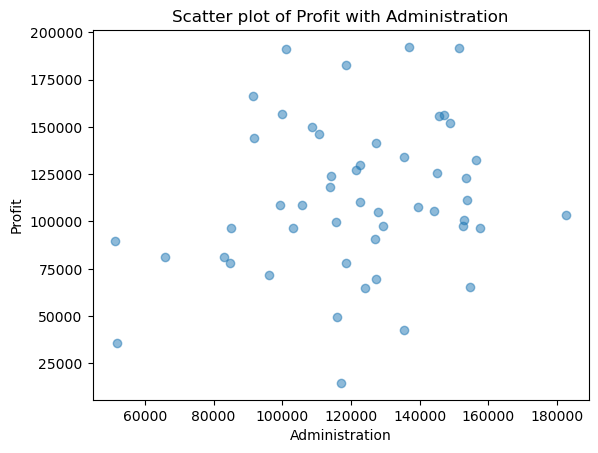

In [85]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

In [86]:
#----------Create the figure object----------#

ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10, 5), fontsize = 14)

#----------Set the Title----------#
ax.set_title('Average profit for different states where the startups operate', fontsize = 20)

#----------Set x and y axis labels----------#

ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

KeyError: 'State'

In [ ]:
dataset.State.value_counts()

In [ ]:
#----------Create dummy variables for the categorical variable state----------#

dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

#----------Now we will drop the original column state from dataframe----------#

dataset.drop(columns=['State'], axis=1, inplace=True)

In [ ]:
dataset

In [ ]:
#----------Declaring Dependent Variable----------#

dependent_variable = 'Profit'

dependent_variable

In [87]:
#----------Create a list of independent variables----------#

independent_variables = dataset.columns.tolist()

In [88]:
independent_variables.remove(dependent_variable)

In [89]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [90]:
#----------Create the data of Independent variables----------#

X = dataset[independent_variables].values

#----------Create the data of dependent variables----------#

y = dataset[dependent_variable].values

In [91]:
#----------Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [92]:
#----------Transforming Data----------#

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X_train[0:10]

array([[0.11945805, 0.11163611, 0.39269043, 1.        , 0.        ,
        0.        ],
       [0.7281266 , 0.74173276, 0.66049977, 1.        , 0.        ,
        0.        ],
       [0.38145681, 0.5932935 , 0.09768292, 0.        , 1.        ,
        0.        ],
       [0.00469282, 0.49125975, 0.62976785, 0.        , 0.        ,
        1.        ],
       [0.81351695, 0.73016111, 0.27071031, 0.        , 1.        ,
        0.        ],
       [0.37287478, 0.48992809, 0.19316302, 0.        , 0.        ,
        1.        ],
       [0.23067239, 0.24130912, 0.3709309 , 0.        , 1.        ,
        0.        ],
       [0.26411415, 0.        , 0.41762624, 0.        , 1.        ,
        0.        ],
       [0.406478  , 0.4146383 , 0.64599195, 0.        , 0.        ,
        1.        ],
       [0.85897541, 0.30532804, 0.77613557, 0.        , 0.        ,
        1.        ]])

In [94]:
#----------Fitting Multiple Linear Regression to the Training Set----------#


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
#----------Predicting the test set results----------#

y_pred = regressor.predict(X_test)

In [96]:
y_pred

array([160950.2036339 , 130739.59972767, 128947.25602215,  51856.11618879,
       118881.51887321, 151583.08472617, 134419.01696772, 104204.58775076,
       170817.47467992,  52510.17851437])

In [97]:
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))

In [98]:
RMSE

15075.347395184031

In [99]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

11472.587174509239

In [100]:
MSE = mean_squared_error(y_test, y_pred)
MSE

227266099.08548197

In [104]:
R_sq = r2_score(y_test, y_pred)
R_sq

0.9030263619111076

# CONCEPT OF GRADIENT DESCENT

Gradient Descent algorithm:

repeat until convergence 
{ 
   θ_j = θ_j - α (d×J(θ_0, θ_1) / d×θ_j)
   (for j = 1 and j = 0)
} 



Linear Regression Model:

h_θ (X) = θ_0 + θ_1 × X

J(θ_0, θ_1) = 1/2m × ( Σ from i to m (h_θ(X^i) - y^i)^2 )